In [1]:
import pandas as pd

# Задание № 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:
- оценка 2 и ниже — низкий рейтинг;
- оценка 4 и ниже — средний рейтинг;
- оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [19]:
ratings_df = pd.read_csv('./data/ratings.csv')

def classify_movie(rating):
    if rating < 2:
        return 'Низкая'
    elif rating < 4:
        return 'Средняя'
    else:
        return 'Высокая'
    
rated_movies_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
rated_movies_df['cls'] = rated_movies_df['rating'].apply( classify_movie )
rated_movies_df.groupby('cls')['movieId'].count().reset_index().rename({
    'cls': 'Оценка',
    'movieId': 'Количество фильмов'
}, axis=1)

,Оценка,Количество фильмов
0,Высокая,2270
1,Низкая,636
2,Средняя,6818


# Задание № 2

Используйте файл ```keywords.csv```.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

```python
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
```

Результат классификации запишите в отдельный столбец region.


In [28]:
keywords = pd.read_csv('./data/keywords.csv')

def geo_classify(s: str):
    geo_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    
    for k in geo_data: 
        for v in geo_data[k]:
            if v.lower() in s.lower():
                return k
    return 'undefined'

keywords['region'] = keywords['keyword'].apply(geo_classify)
keywords.groupby('region')['keyword'].count()


region
undefined         99253
Дальний Восток       94
Северо-Запад        266
Центр               387
Name: keyword, dtype: int64

# Задание 3

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010 года.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

для каждой строки пройдите по всем годам списка years;
если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [46]:
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')

years = pd.date_range('1950-01-01', '2010-01-01', freq='y').year.to_list()

def check_year(s: str):
    for x in years:
        if str(x) in s:
            return x
    return '1900'

movies['year'] = movies['title'].apply(check_year)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


Немного непонятно, почему например мы строке The Gay Desperado (1936) должны поставить 1900, но ТЗ есть ТЗ :)

In [49]:
ratings_df = pd.read_csv('./data/ratings.csv')
rated_movies_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
rated_movies_df

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857
...,...,...
9061,161944,5.000000
9062,162376,4.500000
9063,162542,5.000000
9064,162672,3.000000


In [54]:
oldy_df = pd.merge(movies, rated_movies_df, left_on='movieId', right_on='movieId')\
    .groupby('year')['rating'].mean().sort_values(ascending=False)
oldy_df

year
1951    3.906653
1952    3.802318
1962    3.772962
1953    3.738878
1957    3.693322
          ...   
2002    3.191918
1997    3.183169
1990    3.166759
2003    3.154081
2001    3.133080
Name: rating, Length: 61, dtype: float64

<Axes: xlabel='year'>

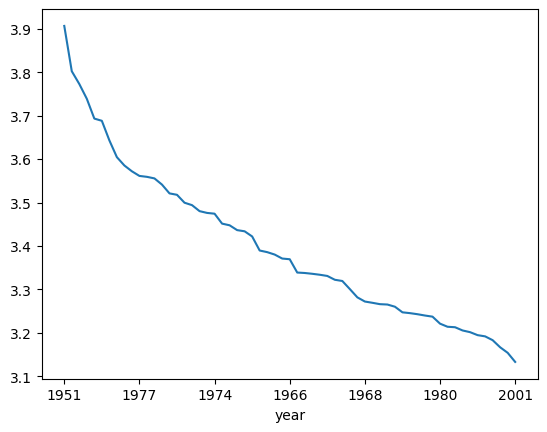

In [55]:
oldy_df.plot()

Раньше было лучше! :-)